Curso de
- Classificação: otimizando modelos de machine learning
- Classificação: selecionando features

# Funções, bibliotecas e Dataframe ficticios

In [12]:
RANDOM_STATE = 3141592

In [13]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [14]:
import requests

# CARREGANDO BASE
arquivo = 'fake_database'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
df = fake_database2()
display(df.head())

arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
print('TUDO OK')

,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,...,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,4.875997,-1.491729,2.491069,1.874948,-0.000381,1.478758,3.972563,0.230329,5.149503,0.595726,...,sim,não,sim,não,sim,A,B,A,C,D
1,3.750108,-0.510656,-0.462908,0.928715,0.496968,-0.995687,2.219878,-1.951839,0.335021,-0.071709,...,não,não,não,sim,não,B,B,C,C,B
2,1.915908,2.793605,2.989653,1.743696,-0.213394,-0.274895,0.106642,1.605156,2.169961,-1.126328,...,sim,sim,sim,não,sim,C,A,C,B,C
3,3.575351,2.779022,4.928382,3.046386,-1.832086,-2.961492,1.171947,1.044997,3.281876,-1.733729,...,não,não,não,sim,não,B,A,A,D,D
4,4.812294,0.316227,0.704474,0.908321,0.050424,-2.080064,2.597434,-1.643092,-0.138313,-1.498914,...,sim,não,não,não,não,A,B,A,D,B


TUDO OK


In [15]:
# Variavel Dependente
var_dep = 'y'
y = df[var_dep]
display(y.head())

x = df.drop('y', axis=1)
display(x.head())

0    0
1    1
2    0
3    1
4    1
Name: y, dtype: object

,x_num0,x_num1,x_num2,x_num3,x_num4,x_num5,x_num6,x_num7,x_num8,x_num9,x_bin0,x_bin1,x_bin2,x_bin3,x_bin4,x_cat0,x_cat1,x_cat2,x_cat_0,x_cat_1
0,4.875997,-1.491729,2.491069,1.874948,-0.000381,1.478758,3.972563,0.230329,5.149503,0.595726,sim,não,sim,não,sim,A,B,A,C,D
1,3.750108,-0.510656,-0.462908,0.928715,0.496968,-0.995687,2.219878,-1.951839,0.335021,-0.071709,não,não,não,sim,não,B,B,C,C,B
2,1.915908,2.793605,2.989653,1.743696,-0.213394,-0.274895,0.106642,1.605156,2.169961,-1.126328,sim,sim,sim,não,sim,C,A,C,B,C
3,3.575351,2.779022,4.928382,3.046386,-1.832086,-2.961492,1.171947,1.044997,3.281876,-1.733729,não,não,não,sim,não,B,A,A,D,D
4,4.812294,0.316227,0.704474,0.908321,0.050424,-2.080064,2.597434,-1.643092,-0.138313,-1.498914,sim,não,não,não,não,A,B,A,D,B


In [16]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)

#df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()
#df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

2 niveis: x_bin0 => ['sim' 'não']
2 niveis: x_bin1 => ['não' 'sim']
2 niveis: x_bin2 => ['sim' 'não']
2 niveis: x_bin3 => ['não' 'sim']
2 niveis: x_bin4 => ['sim' 'não']
3 niveis: x_cat0 => ['A' 'B' 'C']
3 niveis: x_cat1 => ['B' 'A' 'C']
3 niveis: x_cat2 => ['A' 'C' 'B']
3 niveis: x_cat_0 => ['C' 'B' 'D' 'A']
3 niveis: x_cat_1 => ['D' 'B' 'C' 'A']
(750, 32) (250, 32)
(750,) (250,)


# Função de avaliação do modelo

In [17]:
# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay


def avaliar_modelo(y_verdadeiro, y_predito, conjunto_nome):
    """
    Função para avaliar e imprimir o relatório de classificação e a matriz de confusão.
    """
    #if conjunto_nome == "Treino":
     #   pass
    #else:
    print('*' * 70)
    print("Relatório de Classificação para o Conjunto de", conjunto_nome,":\n")
    print(classification_report(y_verdadeiro, y_predito))
    
    print('*' * 55)
    
    print("Matriz de Confusão para o Conjunto de", conjunto_nome,":\n")
    print(confusion_matrix(y_verdadeiro, y_predito))
    print('*' * 70)

    display(RocCurveDisplay.from_predictions(y_verdadeiro, y_predito, name = conjunto_nome))

###############################################################################################
# ou pode-se tbm carregar através de:
'''
import requests
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
'''


'\nimport requests\narquivo = \'ML_supervised_learning\'\nurl = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"\nresponse = requests.get(url)\ncode = response.text\nexec(code)\n'

# Aplicação Basica (apenas para comparar)

## Decision Tree Simples

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       374
           1       0.87      0.80      0.83       376

    accuracy                           0.84       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.84      0.84      0.84       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[329  45]
 [ 75 301]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       124
           1       0.81      0.67      0.74       126

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.75       250
weighted avg       0.76      0.76      0.75       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[104  20]
 [ 41  85]]
**********************************************************************


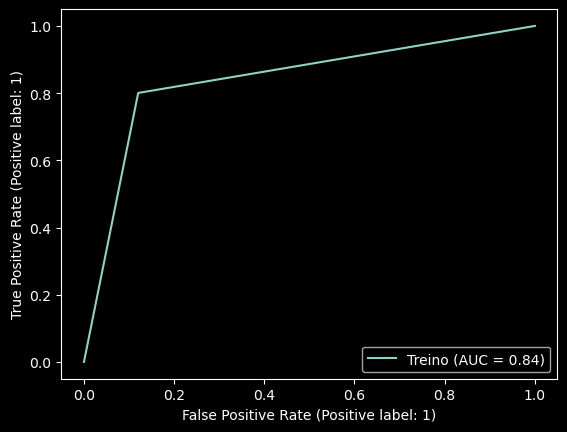

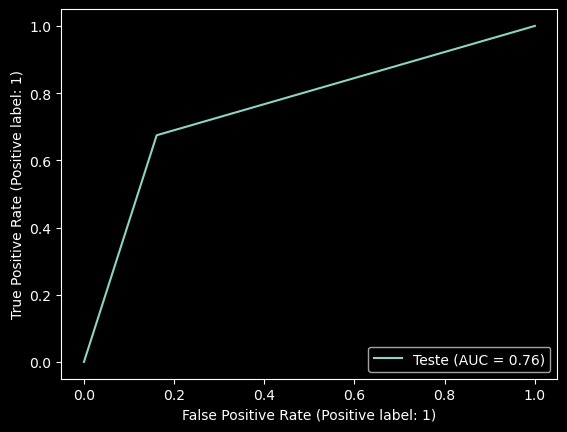

In [18]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
modelo_dt.fit(x_treino, y_treino)
#######################################################################################

# Avaliação no conjunto de treino # Verificando Over/Under(Fitting)
previsoes_treino = modelo_dt.predict(x_treino)
avaliar_modelo(y_treino, previsoes_treino, "Treino")

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = modelo_dt.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

## Logistic Regression

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       374
           1       0.93      0.93      0.93       376

    accuracy                           0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.93      0.93      0.93       750

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[347  27]
 [ 25 351]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       124
           1       0.92      0.88      0.90       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[114  10]
 [ 15 111]]
**********************************************************************


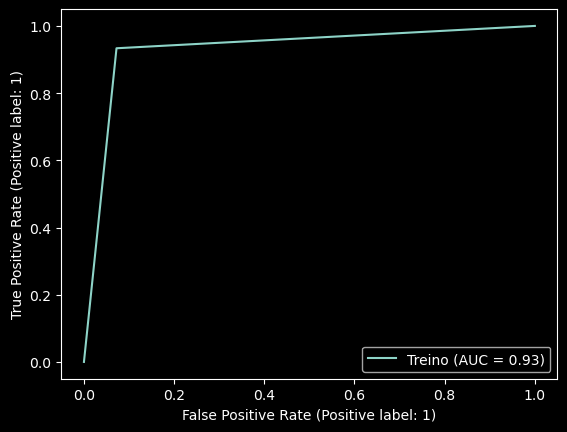

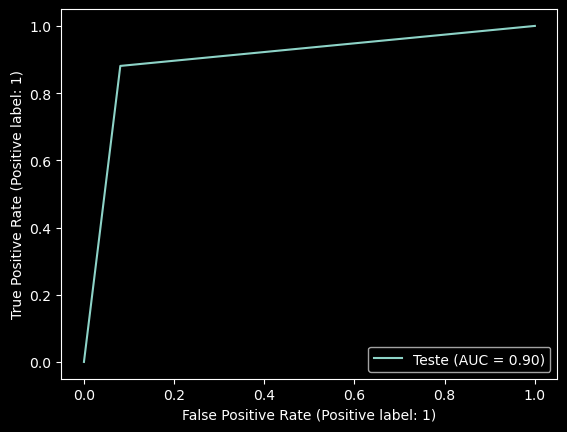

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
classificador = make_pipeline(StandardScaler(), LogisticRegression(random_state=RANDOM_STATE))

#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de treino # Verificando Over/Under(Fitting)
previsoes_treino = classificador.predict(x_treino)
avaliar_modelo(y_treino, previsoes_treino, "Treino")

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")
#######################################################################################

# =======================================

# Busca em Grade (Grid Search) - Otimização de Hiperparâmetros

A Busca em Grade, ou Grid Search, é uma técnica comum para otimização de hiperparâmetros em modelos de aprendizado de máquina. Este método sistemático testa exaustivamente uma série de combinações de hiperparâmetros para determinar a configuração ideal que resulta no melhor desempenho do modelo.

- **Exaustividade:** Ao testar todas as possíveis combinações, garante-se que a melhor configuração dentro do espaço definido será encontrada.

### Funcionamento

1. **Definição do Espaço de Parâmetros:**
   Antes de iniciar a busca, é necessário definir o "grid" de hiperparâmetros, que é essencialmente uma lista de valores a serem testados para cada hiperparâmetro do modelo.

2. **Avaliação Exaustiva:**
   Cada combinação possível de hiperparâmetros no grid é testada. O modelo é treinado com cada conjunto de hiperparâmetros, e seu desempenho é avaliado usando uma métrica específica, geralmente através de validação cruzada.

3. **Seleção do Melhor Modelo:**
   Depois de testar todas as combinações, a configuração que proporciona o melhor desempenho de acordo com a métrica escolhida é selecionada como a ideal.

### Alternativas

- **Busca Aleatória (Random Search):** Ao invés de testar todas as combinações possíveis, a Busca Aleatória seleciona um número fixo de combinações aleatoriamente, reduzindo o tempo necessário para a busca.
- **Métodos Baseados em Gradiente:** Técnicas como otimização bayesiana usam modelos probabilísticos para selecionar inteligentemente os hiperparâmetros que têm maior probabilidade de melhorar o desempenho do modelo.

## Decision Tree Classifier

In [20]:
from sklearn.model_selection import GridSearchCV

# Definindo grade de hiperparametros
param_grid_dt = {
    'criterion': ['gini', 'entropy'], # a função que vai decidir a qualidade de uma divisão
    'max_depth': np.linspace(6, 12, 4, dtype=int), # profundidade da arvore
    'min_samples_split': np.linspace(5, 20, 4, dtype=int), # quantidade minima de amostra para dividir um nó interno
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int), # quantidade minima de amostra para estar em uma folha
    'max_features': ['sqrt', 'log2'], # quantidade máxima de features que devem estar na divisão de um nó
    'splitter': ['best', 'random'] # mede se a forma de divisão é a melhor ou aleatória.
}

# Cross Validation -> CV estratificado
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, 
                     shuffle=True, # embarelhamento dos dados
                     random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=RANDOM_STATE), #classificador - modelo
    param_grid = param_grid_dt,  
    scoring='recall', # metrica que sera avaliada
    n_jobs=-1, # quantidade de processadores para usar da maquina #-1 usa todos os disponiveis
    refit=True, # retreinar com os melhores hiper parametros
    cv=cv, # validação cruzada #
    verbose=0, # mede a quantidade de informações que sera retornada # 0 é o padrão
    pre_dispatch='2*n_jobs', #
    #error_score=nan, #
    return_train_score=False) # scores de treinamento

# Treinando modelo
grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3141592, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=3141592), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [21]:
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.head().T)
###################################################
# melhores hiper-parametros
#display(grid_search.best_params_)

#  melhor modelo
display(cv_results.loc[[grid_search.best_index_]].T)

,0,1,2,3,4
mean_fit_time,0.003501,0.00163,0.002258,0.001502,0.001906
std_fit_time,0.000999,0.000516,0.000391,0.000451,0.000491
mean_score_time,0.002705,0.00233,0.001658,0.001103,0.001799
std_score_time,0.000675,0.000449,0.000546,0.000201,0.000979
param_criterion,gini,gini,gini,gini,gini
param_max_depth,6,6,6,6,6
param_max_features,sqrt,sqrt,sqrt,sqrt,sqrt
param_min_samples_leaf,5,5,5,5,5
param_min_samples_split,5,5,10,10,15
param_splitter,best,random,best,random,best


,71
mean_fit_time,0.001903
std_fit_time,0.000663
mean_score_time,0.001702
std_score_time,0.0004
param_criterion,gini
param_max_depth,8
param_max_features,sqrt
param_min_samples_leaf,5
param_min_samples_split,20
param_splitter,random


In [22]:
num_cat_hip(cv_results, 'param_max_depth', 'mean_test_score')

P-value (Kruskal-Wallis): 0.97


In [23]:
num_cat_hip(cv_results, 'param_min_samples_leaf', 'mean_test_score')

P-value (Kruskal-Wallis): < 0.001
P-value (Pós-Teste de Dunn):
          5       10       15       20
5      1.00  < 0.001  < 0.001  < 0.001
10  < 0.001     1.00     1.00  < 0.001
15  < 0.001     1.00     1.00  < 0.001
20  < 0.001  < 0.001  < 0.001     1.00


None

## Logistic Regression

In [24]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [ # Há duas grades
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, 
                     shuffle=True, # embarelhamento dos dados
                     random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator = make_pipeline(StandardScaler(), LogisticRegression()),
    param_grid = param_grid_lr,
    scoring = "recall",
    n_jobs = -1,
    cv = cv)

grid_search.fit(x_treino, y_treino)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3141592, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [25]:
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.head().T)
###################################################
# melhores hiper-parametros
#display(grid_search.best_params_)

#  melhor modelo
display(cv_results.loc[[grid_search.best_index_]].T)

,0,1,2,3,4
mean_fit_time,0.035288,0.017746,0.018062,0.006217,0.006115
std_fit_time,0.010338,0.014867,0.020414,0.001122,0.001246
mean_score_time,0.003717,0.02296,0.009625,0.002608,0.003611
std_score_time,0.00198,0.026735,0.011843,0.000584,0.001994
param_logisticregression__C,0.001,0.001,0.001,0.001,0.001
param_logisticregression__max_iter,100,100,150,150,200
param_logisticregression__penalty,l2,l2,l2,l2,l2
param_logisticregression__solver,newton-cg,lbfgs,newton-cg,lbfgs,newton-cg
params,"{'logisticregression__C': 0.001, 'logisticregr...","{'logisticregression__C': 0.001, 'logisticregr...","{'logisticregression__C': 0.001, 'logisticregr...","{'logisticregression__C': 0.001, 'logisticregr...","{'logisticregression__C': 0.001, 'logisticregr..."
split0_test_score,0.921053,0.921053,0.921053,0.921053,0.921053


,0
mean_fit_time,0.035288
std_fit_time,0.010338
mean_score_time,0.003717
std_score_time,0.00198
param_logisticregression__C,0.001
param_logisticregression__max_iter,100
param_logisticregression__penalty,l2
param_logisticregression__solver,newton-cg
params,"{'logisticregression__C': 0.001, 'logisticregr..."
split0_test_score,0.921053


In [26]:
num_cat_hip(cv_results, 'param_logisticregression__max_iter', 'mean_test_score')

P-value (Kruskal-Wallis): 1.00


# Nested Cross Validation - Validação Cruzada Aninhada

A validação cruzada aninhada é uma extensão da validação cruzada tradicional que ajuda a obter uma estimativa mais realista e menos otimista do erro de generalização de um modelo. Esta técnica é particularmente útil quando o objetivo é selecionar tanto o modelo quanto os hiperparâmetros de forma mais precisa.

Isso porque ela permite que cada combinação de hiperparâmetros seja avaliada de forma mais imparcial, usando uma parte do conjunto de dados que não foi "vista" pelos hiperparâmetros durante sua seleção.

- **Estimativa Imparcial do Desempenho:** Ao separar a seleção de hiperparâmetros do teste final, a validação cruzada aninhada fornece uma estimativa mais imparcial e geralmente mais conservadora do desempenho do modelo.
- **Validade Estatística:** Ajustar os hiperparâmetros de forma independente para cada fold externo ajuda a evitar o viés e o sobreajuste, aumentando a validade estatística dos resultados.

## Validação Cruzada Aninhada vs. Não Aninhada

### Validação Cruzada Não Aninhada

Na validação cruzada não aninhada (ou padrão), dividimos o conjunto de dados em \( k \) folds e realizamos \( k \) iterações de treinamento e teste. Em cada iteração, um fold diferente é usado como teste, e os restantes são usados para treinamento. Este método é eficaz para avaliar o desempenho do modelo, mas tem algumas limitações:
- **Otimismo no Desempenho:** Como o mesmo conjunto de dados é usado para selecionar os hiperparâmetros e avaliar o modelo, pode haver um viés otimista no desempenho estimado.
- **Dependência de Hiperparâmetros:** A escolha dos hiperparâmetros pode influenciar significativamente a estimativa de desempenho, resultando em uma possível sobreajuste à configuração particular do conjunto de dados de teste.

### Validação Cruzada Aninhada

A validação cruzada aninhada resolve essas questões utilizando dois níveis de validação cruzada:
- **Validação Cruzada Externa:** Divide o conjunto de dados em \( k \) folds externos. Cada fold externo serve uma vez como conjunto de teste, enquanto os folds restantes são usados para a validação cruzada interna.
- **Validação Cruzada Interna:** Dentro de cada fold externo, realiza-se uma segunda validação cruzada para selecionar os hiperparâmetros. Isso significa que os hiperparâmetros são ajustados independentemente para cada fold externo.

## Decision Tree Classifier

In [27]:
# Validação internar
inner_cv = StratifiedKFold(shuffle=True, random_state=RANDOM_STATE)

# Validação externar
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

In [28]:
from sklearn.model_selection import cross_val_score

grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
    param_grid = param_grid_dt,
    scoring = "recall",
    n_jobs = -1,
    cv = inner_cv
    )

# Validação cruzada externa
dt_nested_scores = cross_val_score(grid_search, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {dt_nested_scores}')
print(f'média: {dt_nested_scores.mean()}')

grid_search.fit(x_treino, y_treino)

resultado de cada iteração do cv externo: [0.86507937 0.8        0.8       ]
média: 0.8216931216931217


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3141592, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=3141592), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [29]:
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.head().T)
###################################################
# melhores hiper-parametros
#display(grid_search.best_params_)

#  melhor modelo
display(cv_results.loc[[grid_search.best_index_]].T)

,0,1,2,3,4
mean_fit_time,0.002202,0.001154,0.002467,0.001044,0.001999
std_fit_time,0.00051,0.000282,0.000452,0.000915,0.000001
mean_score_time,0.002001,0.001686,0.001669,0.003443,0.0014
std_score_time,0.000632,0.000548,0.000422,0.001931,0.000489
param_criterion,gini,gini,gini,gini,gini
param_max_depth,6,6,6,6,6
param_max_features,sqrt,sqrt,sqrt,sqrt,sqrt
param_min_samples_leaf,5,5,5,5,5
param_min_samples_split,5,5,10,10,15
param_splitter,best,random,best,random,best


,71
mean_fit_time,0.00312
std_fit_time,0.006241
mean_score_time,0.0
std_score_time,0.0
param_criterion,gini
param_max_depth,8
param_max_features,sqrt
param_min_samples_leaf,5
param_min_samples_split,20
param_splitter,random


# Randomized Search CV (Busca Aleatória) - Otimização de Hiperparâmetros

Randomized Search CV, ou Busca Aleatória, é uma técnica eficaz para otimização de hiperparâmetros em modelos de aprendizado de máquina. Diferente do Grid Search, que testa todas as combinações possíveis de hiperparâmetros, o Randomized Search CV seleciona aleatoriamente um subconjunto dessas combinações, reduzindo o tempo de computação necessário para encontrar uma configuração satisfatória.

### Funcionamento

1. **Definição do Espaço de Hiperparâmetros:**
   - Um espaço de hiperparâmetros é definido da mesma forma que no Grid Search, mas ao invés de testar todas as combinações possíveis, o Randomized Search CV permite especificar um número fixo de combinações para testar.

2. **Seleção Aleatória:**
   - Combinando um algoritmo de seleção aleatória com uma distribuição de probabilidade definida sobre o espaço de hiperparâmetros, essa técnica seleciona aleatoriamente diferentes combinações para avaliação.

3. **Avaliação de Desempenho:**
   - Cada conjunto de hiperparâmetros selecionado é usado para treinar um modelo, e o desempenho é avaliado, geralmente através de validação cruzada. O processo é repetido para o número especificado de iterações.

4. **Escolha do Melhor Modelo:**
   - Após todas as iterações, o conjunto de hiperparâmetros que resultou no melhor desempenho é escolhido como o ideal.

### Vantagens

- **Eficiência:** Menor custo computacional em comparação ao Grid Search, especialmente útil quando o espaço de hiperparâmetros é grande.
- **Exploração mais Ampla:** Possibilidade de descobrir combinações de hiperparâmetros inovadoras que poderiam ser negligenciadas em uma busca exaustiva.

### Considerações

- **Aleatoriedade:** A natureza aleatória da busca significa que não há garantia de encontrar o ótimo global, e os resultados podem variar a cada execução.
- **Número de Iterações:** O número de iterações deve ser escolhido cuidadosamente para equilibrar entre a cobertura do espaço de hiperparâmetros e a viabilidade computacional.

### Aplicações Típicas

Randomized Search CV é ideal para cenários onde a rapidez é essencial e o espaço de hiperparâmetros é tão grande que uma busca exaustiva seria impraticável. É frequentemente usado em estágios iniciais de desenvolvimento de modelo para explorar rapidamente as possibilidades antes de realizar uma otimização mais detalhada.

Este método é uma ferramenta valiosa para cientistas de dados e engenheiros de machine learning que buscam otimizar modelos de forma eficiente e inovadora.


## Decision Tree

In [30]:
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(
    estimator= DecisionTreeClassifier(random_state=RANDOM_STATE), #modelo
    param_distributions=param_grid_dt, #grade de parametros
    n_iter=100, #número de vezes que vamos buscar aleatoriamente dentro da grade de hiperparâmetros essas combinações para avaliar o modelo
    scoring='recall',
    n_jobs=-1,
    cv=inner_cv,
    random_state=RANDOM_STATE)

# Validação cruzada externa
rs_dt_nested_score = cross_val_score(grid_search, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {rs_dt_nested_score}')
print(f'média: {rs_dt_nested_score.mean()}')

grid_search.fit(x_treino, y_treino)

resultado de cada iteração do cv externo: [0.80952381 0.792      0.8       ]
média: 0.8005079365079366


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3141592, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=3141592),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 6,  8, 10, 12]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 5, 10, 15, 20]),
                                        'min_samples_split': array([ 5, 10, 15, 20]),
                                        'splitter': ['best', 'random']},
                   random_state=3141592, scoring='recall')

In [31]:
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.head().T)
###################################################
# melhores hiper-parametros
#display(grid_search.best_params_)

#  melhor modelo
display(cv_results.loc[[grid_search.best_index_]].T)

,0,1,2,3,4
mean_fit_time,0.00108,0.001233,0.001311,0.001843,0.001208
std_fit_time,0.000157,0.000388,0.002622,0.003685,0.00195
mean_score_time,0.001606,0.001033,0.002622,0.00305,0.002647
std_score_time,0.000485,0.000686,0.003212,0.003596,0.002264
param_splitter,random,random,best,random,random
param_min_samples_split,15,20,15,15,5
param_min_samples_leaf,5,15,20,10,15
param_max_features,sqrt,sqrt,sqrt,log2,sqrt
param_max_depth,6,6,8,8,6
param_criterion,gini,entropy,entropy,entropy,gini


,3
mean_fit_time,0.001843
std_fit_time,0.003685
mean_score_time,0.00305
std_score_time,0.003596
param_splitter,random
param_min_samples_split,15
param_min_samples_leaf,10
param_max_features,log2
param_max_depth,8
param_criterion,entropy


## Regressão logistica

In [32]:
grid_search = RandomizedSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
        param_distributions=param_grid_lr,
        n_iter=50,
        scoring='recall',
        n_jobs=-1,
        cv=inner_cv,
        random_state=RANDOM_STATE)
        
# Validação cruzada externa
rs_lr_nested_scores = cross_val_score(grid_search, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {rs_lr_nested_scores}')
print(f'média: {rs_lr_nested_scores.mean()}')

# Treinando modelo
grid_search.fit(x_treino, y_treino)

resultado de cada iteração do cv externo: [0.93650794 0.968      0.904     ]
média: 0.9361693121693122


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3141592, shuffle=True),
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions=[{'logisticregression__C': [0.001, 0.01,
                                                                   0.1, 1, 10],
                                         'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                                         'logisticregression__penalty': ['l2'],
                                         'logisticregression__solver': ['newton-cg',
                                                                        'lbfgs']},
                                        {'logisticregression__C': [0.001, 0.01,
                                                                   0.1, 1, 10],
                                         'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                                         'logisticregression__penalty': ['l1',
                                                                         'l2'],
                                         'logisticregression__solver': ['liblinear']}],
                   random_state=3141592, scoring='recall')

In [33]:
cv_results = pd.DataFrame(grid_search.cv_results_)
display(cv_results.head().T)
###################################################
# melhores hiper-parametros
display(grid_search.best_params_)

#  melhor modelo
display(cv_results.loc[[grid_search.best_index_]].T)

,0,1,2,3,4
mean_fit_time,0.008423,0.003107,0.007002,0.002202,0.003809
std_fit_time,0.001015,0.000812,0.000965,0.000399,0.000927
mean_score_time,0.001701,0.001806,0.001605,0.001606,0.001903
std_score_time,0.000396,0.000404,0.000373,0.000375,0.000494
param_logisticregression__solver,newton-cg,liblinear,newton-cg,liblinear,lbfgs
param_logisticregression__penalty,l2,l1,l2,l1,l2
param_logisticregression__max_iter,300,100,200,200,250
param_logisticregression__C,10,0.1,0.1,0.001,0.1
params,"{'logisticregression__solver': 'newton-cg', 'l...","{'logisticregression__solver': 'liblinear', 'l...","{'logisticregression__solver': 'newton-cg', 'l...","{'logisticregression__solver': 'liblinear', 'l...","{'logisticregression__solver': 'lbfgs', 'logis..."
split0_test_score,0.947368,0.934211,0.934211,0.0,0.934211


{'logisticregression__solver': 'lbfgs',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 250,
 'logisticregression__C': 0.001}

,14
mean_fit_time,0.004209
std_fit_time,0.00025
mean_score_time,0.002305
std_score_time,0.000605
param_logisticregression__solver,lbfgs
param_logisticregression__penalty,l2
param_logisticregression__max_iter,250
param_logisticregression__C,0.001
params,"{'logisticregression__solver': 'lbfgs', 'logis..."
split0_test_score,0.921053


# Otimização Bayesiana - Otimização de Hiperparâmetros

Diferente dos outros métodos exaustivos, a Otimização Bayesiana utiliza um modelo probabilístico para guiar a busca dos melhores hiperparâmetros, visando maximizar a eficiência ao focar nas áreas mais promissoras do espaço de hiperparâmetros.

- **Eficiência na Busca:** Pode encontrar melhores hiperparâmetros em menos iterações do que métodos exaustivos ou aleatórios.
- **Adaptabilidade:** Ajusta dinamicamente a estratégia de busca com base no que foi aprendido sobre o espaço de hiperparâmetros. Porém...
- **Dependência do Modelo de Prior:** A performance da otimização bayesiana pode depender fortemente da escolha do modelo de prior, que precisa ser bem adequado ao problema.

### Funcionamento

1. **Modelo Probabilístico:**
   - A técnica começa com a construção de um modelo probabilístico do espaço de hiperparâmetros. Este modelo, frequentemente um Processo Gaussiano, estima a função de desempenho do modelo de aprendizado de máquina como uma distribuição de probabilidade sobre o espaço de hiperparâmetros.

2. **Atualizações Sequenciais:**
   - Com cada nova avaliação de hiperparâmetros, o modelo probabilístico é atualizado. A técnica utiliza o conceito de "aquisição" para decidir quais hiperparâmetros devem ser avaliados a seguir, baseando-se na probabilidade de melhoria.

3. **Função de Aquisição:**
   - A função de aquisição, como Expected Improvement (EI), Upper Confidence Bound (UCB), ou Probability of Improvement (PI), ajuda a determinar o próximo conjunto de hiperparâmetros a ser testado. Essa função equilibra entre explorar novas áreas do espaço e explorar em torno de hiperparâmetros que já mostraram bons resultados.

4. **Seleção do Melhor Modelo:**
   - O processo continua até que um critério de parada específico seja alcançado, seja ele um número fixo de iterações, um tempo limite, ou uma convergência no desempenho do modelo.

In [34]:
#pip install scikit-optimize

## Decision Tree

In [35]:
# Grade de hiperparametro 
# é definido uma forma diferente....
from skopt.space import Real, Integer, Categorical
space_dt = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(6, 12),
    'min_samples_split': Integer(5, 20),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'splitter': Categorical(['best', 'random'])
}

In [36]:
from skopt import BayesSearchCV

opt_dt = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    search_spaces = space_dt, 
    n_iter=50, # numero de interações
    scoring='recall', 
    n_jobs=-1, 
    cv=inner_cv, 
    random_state=RANDOM_STATE
    )

# Validação cruzada aninhada
bs_dt_nested_scores = cross_val_score(opt_dt, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {bs_dt_nested_scores}')
print(f'média: {bs_dt_nested_scores.mean()}')

opt_dt.fit(x_treino, y_treino)

resultado de cada iteração do cv externo: [0.84126984 0.856      0.792     ]
média: 0.8297566137566138


BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3141592, shuffle=True),
              estimator=DecisionTreeClassifier(random_state=3141592), n_jobs=-1,
              random_state=3141592, scoring='recall',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=6, high=12, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'splitter': Categorical(categories=('best', 'random'), prior=None)})

In [37]:
print(f'resultado de cada iteração do cv externo: {bs_dt_nested_scores}')
print(f'média: {bs_dt_nested_scores.mean()}')

resultado de cada iteração do cv externo: [0.84126984 0.856      0.792     ]
média: 0.8297566137566138


In [38]:
cv_results = pd.DataFrame(opt_dt.cv_results_)
display(cv_results.head().T)
###################################################
# melhores hiper-parametros
#display(opt_dt.best_params_)

#  melhor modelo
display(cv_results.loc[[opt_dt.best_index_]].T)

,0,1,2,3,4
mean_fit_time,0.002898,0.001401,0.001799,0.002202,0.001711
std_fit_time,0.000575,0.000489,0.0004,0.000402,0.000396
mean_score_time,0.002196,0.001901,0.0016,0.0016,0.001024
std_score_time,0.000658,0.000663,0.00049,0.00049,0.000045
param_criterion,entropy,entropy,gini,entropy,gini
param_max_depth,7,10,6,9,6
param_max_features,log2,log2,log2,sqrt,log2
param_min_samples_leaf,13,6,12,9,18
param_min_samples_split,13,8,14,18,14
param_splitter,best,random,best,best,best


,17
mean_fit_time,0.002159
std_fit_time,0.000184
mean_score_time,0.001832
std_score_time,0.000417
param_criterion,gini
param_max_depth,12
param_max_features,sqrt
param_min_samples_leaf,5
param_min_samples_split,13
param_splitter,random


## Regression Logistic

In [39]:
# Definindo Grade
max_iter = Integer(100, 300)
c = Categorical([0.001, 0.01, 0.1, 1, 10])

space_lr = [
    {
        'logisticregression__solver': Categorical(['newton-cg', 'lbfgs']),
        'logisticregression__penalty': Categorical(['l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
    {
        'logisticregression__solver': Categorical(['liblinear']),
        'logisticregression__penalty': Categorical(['l1', 'l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
]

In [40]:
opt_lr = BayesSearchCV(
    estimator=make_pipeline(StandardScaler(), LogisticRegression()),
    search_spaces = space_lr,
    n_iter=50,
    scoring='recall',
    n_jobs=-1,
    cv=inner_cv,
    random_state=RANDOM_STATE)
            
# Validação cruzada aninhada
bs_lr_nested_scores = cross_val_score(opt_lr, x_treino, y_treino, cv=outer_cv)

print(f'resultado de cada iteração do cv externo: {bs_lr_nested_scores}')
print(f'média: {bs_lr_nested_scores.mean()}')

opt_dt.fit(x_treino, y_treino)

resultado de cada iteração do cv externo: [0.93650794 0.968      0.904     ]
média: 0.9361693121693122


BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3141592, shuffle=True),
              estimator=DecisionTreeClassifier(random_state=3141592), n_jobs=-1,
              random_state=3141592, scoring='recall',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=6, high=12, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'splitter': Categorical(categories=('best', 'random'), prior=None)})

In [41]:
cv_results = pd.DataFrame(opt_dt.cv_results_)
display(cv_results.head().T)
###################################################
# melhores hiper-parametros
#display(opt_dt.best_params_)

#  melhor modelo
display(cv_results.loc[[opt_dt.best_index_]].T)

,0,1,2,3,4
mean_fit_time,0.00364,0.002432,0.001903,0.003334,0.00176
std_fit_time,0.000612,0.000589,0.000494,0.000896,0.00029
mean_score_time,0.001903,0.001331,0.001502,0.002353,0.001764
std_score_time,0.000664,0.000381,0.000447,0.000622,0.000462
param_criterion,entropy,entropy,gini,entropy,gini
param_max_depth,7,10,6,9,6
param_max_features,log2,log2,log2,sqrt,log2
param_min_samples_leaf,13,6,12,9,18
param_min_samples_split,13,8,14,18,14
param_splitter,best,random,best,best,best


,17
mean_fit_time,0.0014
std_fit_time,0.000489
mean_score_time,0.001605
std_score_time,0.000483
param_criterion,gini
param_max_depth,12
param_max_features,sqrt
param_min_samples_leaf,5
param_min_samples_split,13
param_splitter,random


Entendendo qual técnica usar
Após apresentar essas técnicas de otimização bayesiana, surge a pergunta: qual delas escolher? A resposta é: depende. A escolha depende do seu propósito e da sua situação.

Se você possui um `conjunto de dados não tão grande ou um espaço de busca limitado, o Grid Search pode ser uma opção.`
Para conjuntos de dados extensos, a busca aleatória pode ser uma alternativa.

No entanto, se o espaço de busca é vasto, como de 100 a 300, e utilizar o Randomized Search ou o Grid Search implicaria em uma variação grande, por exemplo, de 10 em 10, pode ser mais eficaz considerar a otimização bayesiana.

Assim, teria mais ou menos uns 200 opções só para o max_depth. Utilizando a otimização bayesiana, ele vai escolher valores entre 100 e 300, por exemplo. Portanto, se tiver espaços de busca muito elevados, com muitos valores, talvez a otimização bayesiana seja uma melhor opção, já que ela também aprende com os resultados anteriores.

## LazyClassifier

LazyPedict é uma biblioteca que ajuda a semi-automatizar os modelos de Machine Learning.

Essa biblioteca constrói muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem qualquer ajuste de parâmetro.

Após a obtenção dos resultados de acurácia e avaliação das métricas podemos escolher os melhores modelos e aplicar o ajuste de hiperparâmetros a eles.

Então, no caso dos dados deste projeto vou usar o LazyClassifier para tentar resolver o problema de classificação:

In [42]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

np.random.seed(73246) #para garantir a reprodutibilidade

#x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x, x_teste, y, y_teste) 
'''"clf" está retornando dois valores, Modelo e Previsão, enquanto modelo significa 
todos os modelos e com algumas métricas e previsão significa todo o valor previsto que é ŷ'''
models

ModuleNotFoundError: No module named 'lazypredict'